In [1]:
PATH = "./outputs"
FILES = [
    "Qwen_Qwen3-Embedding-8B_gpt-5-mini_wellbeing_500_3.csv",
    "Qwen_Qwen3-Embedding-8B_gpt-5_wellbeing_500_3.csv",
    "Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_wellbeing_500_3.csv",
]
LABELS = ["gpt-5-mini", "gpt-5", "Qwen-3-30B"]
SUBFOLDER = "wellbeing"
GROLTS_LABELS = True

In [2]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")

# Set general plot parameters for Overleaf (1-column A4)
plt.rcParams.update(
    {
        "figure.figsize": (3.3, 2.5),  # inches, ~1-column width
        "axes.titlesize": 18,
        "axes.labelsize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
        "pdf.fonttype": 42,  # vector fonts
        "ps.fonttype": 42,
    }
)

In [ ]:
def load_llm_accuracies(df_labels):
    data = {}

    for f in FILES:
        df = pd.read_csv(f"{PATH}/{f}")
        
        filename = os.path.basename(f).replace(".csv", "")
        df_merged = df.merge(
            df_labels, on=["paper_id", "question_id"], suffixes=("_pred", "_true")
        )
        df_merged["correct"] = (
            df_merged["answer_pred"] == df_merged["answer_true"]
        ).astype(int)
        acc = df_merged.groupby("question_id")["correct"].mean()
        data[filename] = acc
    acc_df = pd.DataFrame(data).sort_index()
    return acc_df


def plot_mapped_accuracy_heatmaps(acc_df):
    # Sort for consistent mapping
    acc_df = acc_df.sort_index()

    plt.figure(figsize=(7, 5))
    ax = sns.heatmap(
        acc_df,
        vmin=0,
        vmax=1,
        cmap=sns.diverging_palette(20, 145, as_cmap=True),
        cbar=True,
        cbar_kws={"label": "Accuracy", "pad": 0.1},
        annot=True,
        annot_kws={"size": 14},
        fmt=".2f",
    )
    
    ax.set_xticklabels(LABELS, ha="center", rotation=0)

    plt.tight_layout()
    plt.savefig(f"./viz/{SUBFOLDER}_comparison.pdf", bbox_inches="tight")
    plt.show()

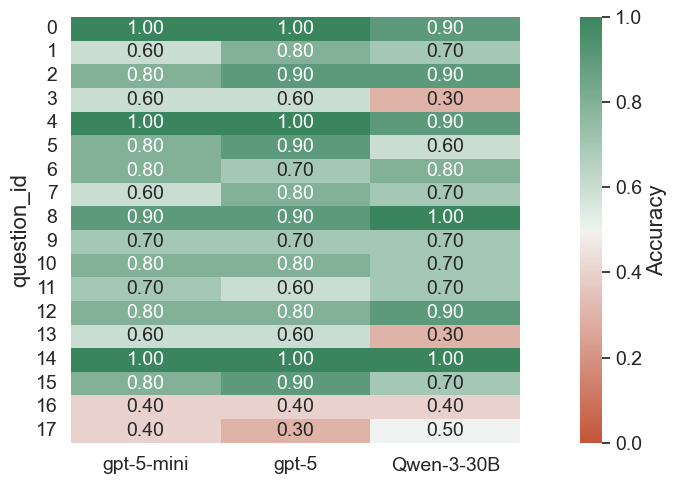

In [4]:
# Load labels
df_labels = pd.read_csv(f"./human_labels/{SUBFOLDER}.csv", delimiter=";", dtype=int)
df_labels = df_labels.melt(
    id_vars=["paper_id"], var_name="question_id", value_name="answer"
)
df_labels["paper_id"] = df_labels["paper_id"].astype(int)
df_labels["question_id"] = df_labels["question_id"].astype(int)
df_labels["answer"] = df_labels["answer"].astype(int)

acc_df = load_llm_accuracies(df_labels)
plot_mapped_accuracy_heatmaps(acc_df)

In [5]:
print("Mean accuracies per model:")
display(acc_df.mean().sort_values(ascending=False))

Mean accuracies per model:


Qwen_Qwen3-Embedding-8B_gpt-5_wellbeing_500_3                               0.761111
Qwen_Qwen3-Embedding-8B_gpt-5-mini_wellbeing_500_3                          0.738889
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_wellbeing_500_3    0.705556
dtype: float64